In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sp
import datetime as dt
import graspy as gp
import collections
import community
import simpy
import random
from graspy.simulations import sbm
from graspy.plot import heatmap

import cmocean as cmo
from collections import Counter
from numpy.random import normal, poisson, power

import community
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [79]:
data = pd.read_csv('arbetsmarknaddata.csv', sep = ';')
datamod = data.drop(axis = 1, labels = 'Data')
dataarray = np.asarray(datamod)

In [80]:
colnames = list(datamod.columns)

In [81]:
yoydata = np.zeros((10,16))
for i in range(len(dataarray)-1):
    for j in range(16):
        yoydata[i][j] = 1 - dataarray[i][j]/dataarray[i+1][j]

In [82]:
corr = np.corrcoef(yoydata, rowvar= False)

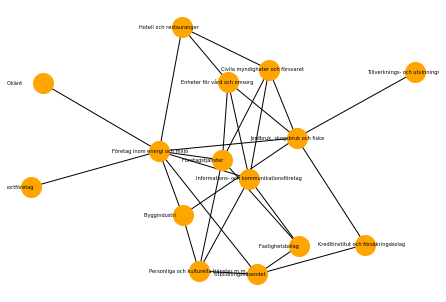

In [83]:
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corrdf = pd.DataFrame(corr, columns = colnames, index = colnames)

 
# Transform it in a links data frame (3 columns only):
links = corrdf.stack().reset_index()
links.columns = ['var1', 'var2','value']

 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] < 0) & (links['var1'] != links['var2']) ]
links_filtered
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=5)


In [78]:
corrdf

,Byggindustri,Civila myndigheter och försvaret,Enheter för vård och omsorg,Fastighetsbolag,Företag inom energi och miljö,Företagstjänster,Handel,Hotell och restauranger,Informations- och kommunikationsföretag,"Jordbruk, skogsbruk och fiske",Kreditinstitut och försäkringsbolag,Okänt,Personliga och kulturella tjänster m.m.,Tillverknings- och utvinningsindustri,Transportföretag,Utbildningsväsendet
Byggindustri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Civila myndigheter och försvaret,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enheter för vård och omsorg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fastighetsbolag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Företag inom energi och miljö,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Företagstjänster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Handel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hotell och restauranger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Informations- och kommunikationsföretag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Jordbruk, skogsbruk och fiske",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
